In [1]:
!pip install wordcloud


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
!pip install sumy


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
!pip install rouge


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# 1 Importing the required Libraries

In [6]:
import numpy as np
import pandas as pd
import warnings
import re
import nltk
from nltk import word_tokenize
from nltk.tokenize import sent_tokenize
from textblob import TextBlob
import string
from string import punctuation
from nltk.corpus import stopwords
from statistics import mean
from heapq import nlargest
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt

stop_words = set(stopwords.words('english'))
punctuation = punctuation + '\n' + '—' + '“' + ',' + '”' + '‘' + '-' + '’'
warnings.filterwarnings('ignore')

In [7]:
# Importing the dataset
df_1 = pd.read_csv("C:/Users/Hp/Downloads/CSE412/Text Summarizer/articles1.csv/articles1.csv")

In [8]:
# Making one Dataframe by appending all of them for the further process
d = [df_1]
df = pd.concat(d, keys = ['x', 'y', 'z'])
df.rename(columns = {'content' : 'article'}, inplace = True);

In [9]:
df.head()

Unnamed: 0     id                                              title  \
x 0           0  17283  House Republicans Fret About Winning Their Hea...   
  1           1  17284  Rift Between Officers and Residents as Killing...   
  2           2  17285  Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...   
  3           3  17286  Among Deaths in 2016, a Heavy Toll in Pop Musi...   
  4           4  17287  Kim Jong-un Says North Korea Is Preparing to T...   

        publication                         author        date    year  month  \
x 0  New York Times                     Carl Hulse  2016-12-31  2016.0   12.0   
  1  New York Times  Benjamin Mueller and Al Baker  2017-06-19  2017.0    6.0   
  2  New York Times                   Margalit Fox  2017-01-06  2017.0    1.0   
  3  New York Times               William McDonald  2017-04-10  2017.0    4.0   
  4  New York Times                  Choe Sang-Hun  2017-01-02  2017.0    1.0   

     url                                            article  
x 0  NaN  WASHINGTON  —   Congressional Republicans have...  
  1  NaN  After the bullet shells get counted, the blood...  
  2  NaN  When Walt Disney’s “Bambi” opened in 1942, cri...  
  3  NaN  Death may be the great equalizer, but it isn’t...  
  4  NaN  SEOUL, South Korea  —   North Korea’s leader, ...

In [10]:
# Shape of the dataset
print ("The shape of the dataset : ", df.shape)

The shape of the dataset :  (50000, 10)


In [11]:
# Dropping the unnecessary columns
df.drop(columns = ['Unnamed: 0'], inplace = True)
df.head()

id                                              title     publication  \
x 0  17283  House Republicans Fret About Winning Their Hea...  New York Times   
  1  17284  Rift Between Officers and Residents as Killing...  New York Times   
  2  17285  Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...  New York Times   
  3  17286  Among Deaths in 2016, a Heavy Toll in Pop Musi...  New York Times   
  4  17287  Kim Jong-un Says North Korea Is Preparing to T...  New York Times   

                            author        date    year  month  url  \
x 0                     Carl Hulse  2016-12-31  2016.0   12.0  NaN   
  1  Benjamin Mueller and Al Baker  2017-06-19  2017.0    6.0  NaN   
  2                   Margalit Fox  2017-01-06  2017.0    1.0  NaN   
  3               William McDonald  2017-04-10  2017.0    4.0  NaN   
  4                  Choe Sang-Hun  2017-01-02  2017.0    1.0  NaN   

                                               article  
x 0  WASHINGTON  —   Congressional Republicans have...  
  1  After the bullet shells get counted, the blood...  
  2  When Walt Disney’s “Bambi” opened in 1942, cri...  
  3  Death may be the great equalizer, but it isn’t...  
  4  SEOUL, South Korea  —   North Korea’s leader, ...

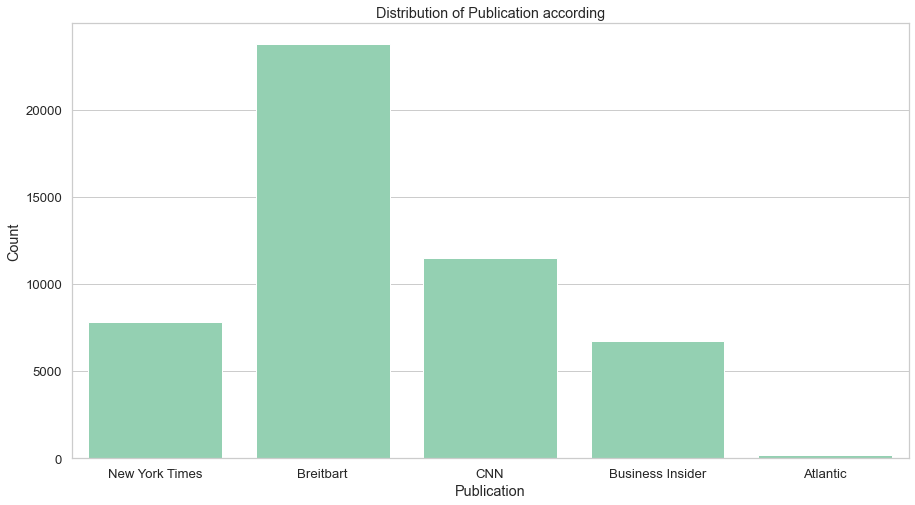

In [12]:
# Set the size of the figure
plt.rcParams['figure.figsize'] = [15, 8]

# Set the font scale and style for seaborn
sns.set(font_scale=1.2, style='whitegrid')

# Create a countplot to show the distribution of 'Publication' in the DataFrame 'df'
sns_year = sns.countplot(df['publication'], color='#8adab2')

# Set labels for the x-axis and y-axis, and a title for the plot
sns_year.set(xlabel="Publication", ylabel="Count", title="Distribution of Publication according")

# Display the plot
plt.show()


# 2 Exploratory Data Analysis

In [13]:
# Replacing the unnecessary row value of year with it's actual values
df['year'] = df['year'].replace("https://www.nytimes.com/2016/12/31/nyregion/bronx-murder-40th-precinct-police-residents.html", 2016)

In [14]:
# Years
df['year'].value_counts()

2016.0    28451
2017.0    17908
2015.0     3326
2013.0      212
2014.0       76
2012.0       26
2011.0        1
Name: year, dtype: int64

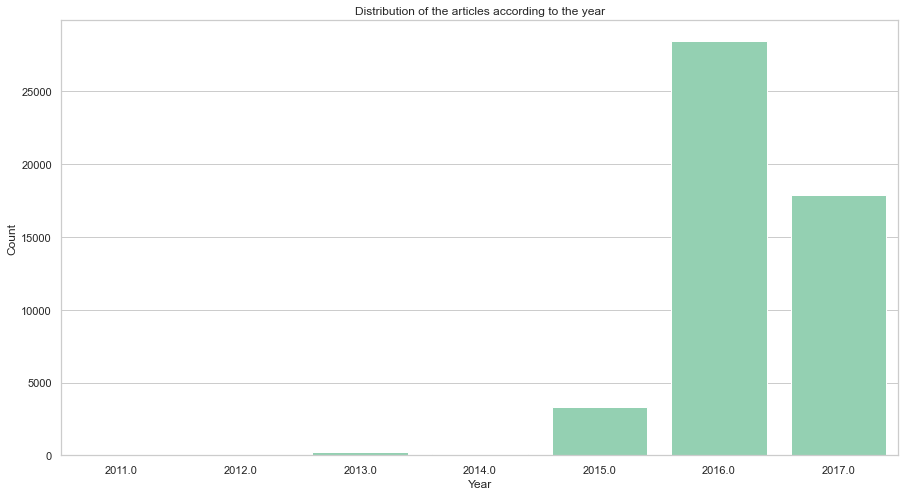

In [15]:
# Set the size of the figure
plt.rcParams['figure.figsize'] = [15, 8]

# Set the font scale and style for seaborn
sns.set(font_scale=1.0, style='whitegrid')

# Create a countplot to show the distribution of 'year' in the DataFrame 'df'
sns_year = sns.countplot(df['year'], color='#8adab2')

# Set labels for the x-axis and y-axis, and a title for the plot
sns_year.set(xlabel="Year", ylabel="Count", title="Distribution of the articles according to the year")

# Display the plot
plt.show()


In [16]:
# Authors
df['author'].value_counts()

Breitbart News                                                     1559
Pam Key                                                            1282
Charlie Spiering                                                    928
Jerome Hudson                                                       806
John Hayward                                                        747
                                                                   ... 
Julie Bosman and Monica Davey                                         1
Michael D. Shear, Maggie Haberman and Alan Rappeport                  1
Nicholas Fandos and Eric Lipton                                       1
Alan Rappeport, Eric Lichtblau, Maggie Haberman and Adam Liptak       1
Julia Ioffe                                                           1
Name: author, Length: 3603, dtype: int64

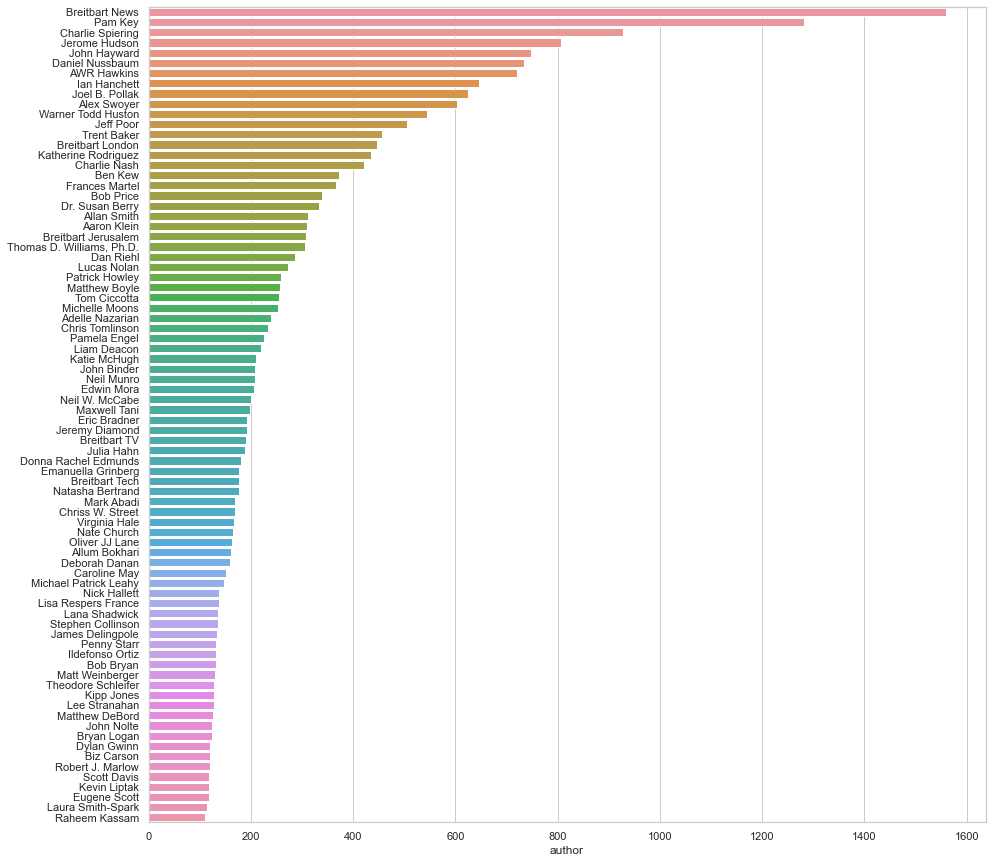

In [17]:
# Set the size of the figure
plt.rcParams['figure.figsize'] = [15, 15]

# Set the font scale and style for seaborn
sns.set(font_scale=1, style='whitegrid')

# Count the occurrences of each author and select the top 80
df_author = df.author.value_counts().head(80)

# Create a barplot to show the distribution of authors
sns.barplot(df_author, df_author.index)

# Set labels for the x-axis and y-axis, and a title for the plot
sns_year.set(xlabel="Count", ylabel="Author", title="The Most Frequent Authors")

# Display the plot
plt.show()


# 3 Making the Article Summarizer

In [18]:
contractions_dict = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"doesn’t": "does not",
"don't": "do not",
"don’t": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y’all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have",
"ain’t": "am not",
"aren’t": "are not",
"can’t": "cannot",
"can’t’ve": "cannot have",
"’cause": "because",
"could’ve": "could have",
"couldn’t": "could not",
"couldn’t’ve": "could not have",
"didn’t": "did not",
"doesn’t": "does not",
"don’t": "do not",
"don’t": "do not",
"hadn’t": "had not",
"hadn’t’ve": "had not have",
"hasn’t": "has not",
"haven’t": "have not",
"he’d": "he had",
"he’d’ve": "he would have",
"he’ll": "he will",
"he’ll’ve": "he will have",
"he’s": "he is",
"how’d": "how did",
"how’d’y": "how do you",
"how’ll": "how will",
"how’s": "how is",
"i’d": "i would",
"i’d’ve": "i would have",
"i’ll": "i will",
"i’ll’ve": "i will have",
"i’m": "i am",
"i’ve": "i have",
"isn’t": "is not",
"it’d": "it would",
"it’d’ve": "it would have",
"it’ll": "it will",
"it’ll’ve": "it will have",
"it’s": "it is",
"let’s": "let us",
"ma’am": "madam",
"mayn’t": "may not",
"might’ve": "might have",
"mightn’t": "might not",
"mightn’t’ve": "might not have",
"must’ve": "must have",
"mustn’t": "must not",
"mustn’t’ve": "must not have",
"needn’t": "need not",
"needn’t’ve": "need not have",
"o’clock": "of the clock",
"oughtn’t": "ought not",
"oughtn’t’ve": "ought not have",
"shan’t": "shall not",
"sha’n’t": "shall not",
"shan’t’ve": "shall not have",
"she’d": "she would",
"she’d’ve": "she would have",
"she’ll": "she will",
"she’ll’ve": "she will have",
"she’s": "she is",
"should’ve": "should have",
"shouldn’t": "should not",
"shouldn’t’ve": "should not have",
"so’ve": "so have",
"so’s": "so is",
"that’d": "that would",
"that’d’ve": "that would have",
"that’s": "that is",
"there’d": "there would",
"there’d’ve": "there would have",
"there’s": "there is",
"they’d": "they would",
"they’d’ve": "they would have",
"they’ll": "they will",
"they’ll’ve": "they will have",
"they’re": "they are",
"they’ve": "they have",
"to’ve": "to have",
"wasn’t": "was not",
"we’d": "we would",
"we’d’ve": "we would have",
"we’ll": "we will",
"we’ll’ve": "we will have",
"we’re": "we are",
"we’ve": "we have",
"weren’t": "were not",
"what’ll": "what will",
"what’ll’ve": "what will have",
"what’re": "what are",
"what’s": "what is",
"what’ve": "what have",
"when’s": "when is",
"when’ve": "when have",
"where’d": "where did",
"where’s": "where is",
"where’ve": "where have",
"who’ll": "who will",
"who’ll’ve": "who will have",
"who’s": "who is",
"who’ve": "who have",
"why’s": "why is",
"why’ve": "why have",
"will’ve": "will have",
"won’t": "will not",
"won’t’ve": "will not have",
"would’ve": "would have",
"wouldn’t": "would not",
"wouldn’t’ve": "would not have",
"y’all": "you all",
"y’all": "you all",
"y’all’d": "you all would",
"y’all’d’ve": "you all would have",
"y’all’re": "you all are",
"y’all’ve": "you all have",
"you’d": "you would",
"you’d’ve": "you would have",
"you’ll": "you will",
"you’ll’ve": "you will have",
"you’re": "you are",
"you’re": "you are",
"you’ve": "you have",
}

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.tokenize.treebank import TreebankWordDetokenizer
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from nltk.tag import pos_tag
from heapq import nlargest
from wordcloud import WordCloud
from string import punctuation
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.text_rank import TextRankSummarizer

# Assuming 'contractions_dict' is defined somewhere in your code
contractions_re = re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function to clean the HTML from the article
def clean_html(raw_html):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', raw_html)
    return cleantext

# Function to expand contractions
def expand_contractions(s, contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, s)

# Function to preprocess the articles
def preprocessing(article):
    global article_sent
    
    # Convert to lowercase
    article = article.str.lower()
    
    # Remove HTML
    article = article.apply(lambda x: clean_html(x))
    
    # Remove email IDs
    article = article.apply(lambda x: re.sub(r'\S+@\S+', '', x))
    
    # Remove URLs
    article = article.apply(lambda x: re.sub(r"http\S+|www\S+|https\S+", '', x))
    
    # Remove '\xa0'
    article = article.apply(lambda x: x.replace("\xa0", " "))
    
    # Expand contractions
    article = article.apply(lambda x: expand_contractions(x))
    
    # Strip possessives
    article = article.apply(lambda x: x.replace("'s", ''))
    article = article.apply(lambda x: x.replace('’s', ''))
    article = article.apply(lambda x: x.replace("\'s", ''))
    article = article.apply(lambda x: x.replace("\’s", ''))
    
    # Remove trailing and leading whitespace and double spaces
    article = article.apply(lambda x: re.sub(' +', ' ', x.strip()))
    
    # Copy the article for sentence tokenization
    article_sent = article.copy()
    
    # Remove punctuation
    article = article.apply(lambda x: ''.join(word for word in x if word not in punctuation))
    
    # Remove trailing and leading whitespace and double spaces again
    article = article.apply(lambda x: re.sub(' +', ' ', x.strip()))
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    article = article.apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))
    
    return article

# Function to normalize the word frequency which is used in the function word_frequency
def normalize(li_word):
    normalized_freq = []
    for dictionary in li_word:
        max_frequency = max(dictionary.values())
        normalized_dict = {word: freq / max_frequency for word, freq in dictionary.items()}
        normalized_freq.append(normalized_dict)
    return normalized_freq

# Function to calculate the word frequency
def word_frequency(article_word):
    li_word = []
    for sentence in article_word:
        word_frequency = {}
        for word in word_tokenize(sentence):
            word_frequency[word] = word_frequency.get(word, 0) + 1
        li_word.append(word_frequency)
    return normalize(li_word)

# Function to Score the sentence which is called in the function sent_token
def sentence_score(li, normalized_freq):
    sentence_score_list = []
    for list_, dictionary in zip(li, normalized_freq):
        sentence_score = {}
        for sent in list_:
            for word in word_tokenize(sent):
                if word in dictionary:
                    sentence_score[sent] = sentence_score.get(sent, 0) + dictionary[word]
        sentence_score_list.append(sentence_score)
    return sentence_score_list

# Function to tokenize the sentence
def sent_token(article_sent):
    sentence_list = []
    sent_token = []
    for sent in article_sent:
        token = sent_tokenize(sent)
        for sentence in token:
            token_2 = ''.join(word for word in sentence if word not in punctuation)
            token_2 = re.sub(' +', ' ', token_2)
            sent_token.append(token_2)
        sentence_list.append(sent_token)
        sent_token = []
    return sentence_score(sentence_list, normalized_freq)

# Function which generates the summary of the articles (This uses the 20% of the sentences with the highest score)
def summary(sentence_score_OwO):
    summary_list = []
    for summ in sentence_score_OwO:
        select_length = int(len(summ) * 0.25)
        summary_ = nlargest(select_length, summ, key=summ.get)
        summary_list.append(".".join(summary_))
    return summary_list

# Functions to change the article string (if passed) to change it to generate a pandas series
def make_series(art):
    data_dict = {'article': [art]}
    return pd.DataFrame(data_dict)['article']

# Function which is to be called to generate the summary which in further calls other functions all together
def article_summarize(artefact):
    global normalized_freq
    if type(artefact) != pd.Series:
        artefact = make_series(artefact)
    
    df = preprocessing(artefact)
    
    normalized_freq = word_frequency(df)
    
    sentence_score_OwO = sent_token(article_sent)
    
    summarized_article = summary(sentence_score_OwO)
    
    return summarized_article

# Function to apply TextRank summarization
def textrank_summarize(article_text):
    parser = PlaintextParser.from_string(article_text, Tokenizer("english"))
    summarizer = TextRankSummarizer()
    summary = summarizer(parser.document, sentences_count=5)  # Adjust sentences_count as needed
    return " ".join(str(sentence) for sentence in summary)


# Generating the Word Cloud of the article using the preprocessing and make_series function mentioned below
def word_cloud(art):
    art_ = make_series(art)
    OwO = preprocessing(art_)
    wordcloud_ = WordCloud(height=500, width=1000, background_color='white').generate(OwO)
    plt.figure(figsize=(15, 10))
    plt.imshow(wordcloud_, interpolation='bilinear')
    plt.axis('off')

# Generating the summaries for the first 100 articles
summaries = article_summarize(df['article'][0:100])

In [20]:
print ("The Actual length of the article is : ", len(df['article'][0]))
df['article'][0]

The Actual length of the article is :  5607


'WASHINGTON  —   Congressional Republicans have a new fear when it comes to their    health care lawsuit against the Obama administration: They might win. The incoming Trump administration could choose to no longer defend the executive branch against the suit, which challenges the administration’s authority to spend billions of dollars on health insurance subsidies for   and   Americans, handing House Republicans a big victory on    issues. But a sudden loss of the disputed subsidies could conceivably cause the health care program to implode, leaving millions of people without access to health insurance before Republicans have prepared a replacement. That could lead to chaos in the insurance market and spur a political backlash just as Republicans gain full control of the government. To stave off that outcome, Republicans could find themselves in the awkward position of appropriating huge sums to temporarily prop up the Obama health care law, angering conservative voters who have been 

In [21]:
print ("The length of the summarized article is : ", len(summaries[0]))
textrank_summary = textrank_summarize(df.values[0])
print(textrank_summary)

The length of the summarized article is :  1688
” In a potentially   decision in 2015, Judge Rosemary M. Collyer ruled that House Republicans had the standing to sue the executive branch over a spending dispute and that the Obama administration had been distributing the health insurance subsidies, in violation of the Constitution, without approval from Congress. Anticipating that the Trump administration might not be inclined to mount a vigorous fight against the House Republicans given the  ’s dim view of the health care law, a team of lawyers this month sought to intervene in the case on behalf of two participants in the health care program. In their request, the lawyers predicted that a deal between House Republicans and the new administration to dismiss or settle the case “will produce devastating consequences for the individuals who receive these reductions, as well as for the nation’s health insurance and health care systems generally. ” No matter what happens, House Republicans 

In [22]:
print ("The Actual length of the article is : ", len(df['article'][0]))
df['article'][8]

The Actual length of the article is :  5607


'Just how   is Hillary Kerr, the    founder of a   digital media company in Los Angeles? She can tell you what song was playing five years ago on the jukebox at the bar where she somewhat randomly met the man who became her husband. It was “These Days,” the version sung by Nico, the German   made famous by Andy Warhol and the Velvet Underground. Actually, the song had been playing just before she met Jonathan Leahy, now 38, on that December night in 2011 at the 4100 Bar in the Silver Lake district of Los Angeles. Ms. Kerr can’t remember exactly what was playing when they met because at that moment she was jumping up and down “like Tigger,” as she put it. In answering the usual     questions, Mr. Leahy told her he was a music supervisor for “Girls,” the HBO show created by and starring Lena Dunham. That was enough to get Ms. Kerr bouncing. “Your music has changed my life!” she told Mr. Leahy. Mr. Leahy, who is quiet but not shy (at least he doesn’t jump up and down upon meeting people) 

In [23]:
print ("The length of the summarized article is : ", len(summaries[0]))
summaries[8]

The length of the summarized article is :  1688


'that is when mr leahy and ms kerr moved into the ambiguous “mixtape era” in which for months they emailed and texted each other with coy “are we just friends or what” texts revolving around music.four musicians played “once with feeling” an instrumental song mr leahy wrote for ms kerr just minutes into the cocktail reception a few of ms kerr best friends descended upon her.this is the same man who sent her the song “bedbedbedbedbed vacationer remix” by deleted scenes “during the friend phase” ms kerr said.” after a romantic first dance to solomon burke “if you need me” mr and mrs leahy she will use her maiden name professionally settled into several hours of serious dancing to songs spun by a d j and before they left for their hawaiian honeymoon mr leahy completed his first important act as husband.she made mr leahy a mix cd handwritten liner notes and all that she titled “feynman diagrams for all” after mr leahy told her in a text conversation that he thought the idea of feynman diag

Textrank BLEU Score: 0.06167892342373361
Article Summarize BLEU Score: 0.04924285571841851


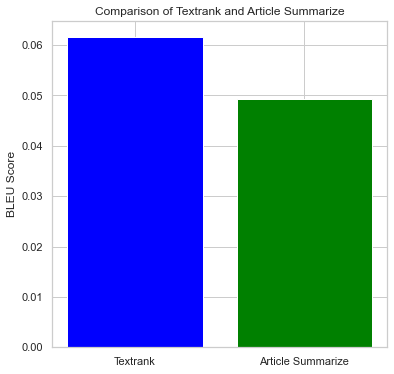

In [47]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

# Function to calculate BLEU score
def calculate_bleu_score(reference, candidate):
    reference = [word_tokenize(reference)]
    candidate = word_tokenize(candidate)
    smooth = SmoothingFunction().method4
    score = sentence_bleu(reference, candidate, smoothing_function=smooth)
    return score

# Function to generate summaries and calculate BLEU scores
def generate_and_compare_summaries(article_text):
    textrank_summary = textrank_summarize(article_text)
    article_summary = article_summarize(article_text)[0]  # Assuming article_summarize returns a list of summaries

    # Calculate BLEU scores
    bleu_textrank = calculate_bleu_score(article_text, textrank_summary)
    bleu_article = calculate_bleu_score(article_text, article_summary)

    return textrank_summary, article_summary, bleu_textrank, bleu_article

# Example: Generate and compare summaries for the first article
article_text = df['article'][0]
textrank_summary, article_summary, bleu_textrank, bleu_article = generate_and_compare_summaries(article_text)

# Print BLEU scores
print(f"Textrank BLEU Score: {bleu_textrank}")
print(f"Article Summarize BLEU Score: {bleu_article}")

# Create a plot
labels = ['Textrank', 'Article Summarize']
bleu_scores = [bleu_textrank, bleu_article]

plt.figure(figsize=(6,6))
plt.bar(labels, bleu_scores, color=['blue', 'green'])
plt.ylabel('BLEU Score')
plt.title('Comparison of Textrank and Article Summarize')
plt.show()


In [48]:
import pandas as pd

# Assuming df is your DataFrame
dataset_summary = pd.DataFrame({
    'Feature': df.columns,
    'Data Type': df.dtypes.values,
    'Unique Values': df.nunique().values,
    'Missing Values': df.isnull().sum().values,
    'Example Value': df.iloc[0].values
})

print(dataset_summary)

       Feature Data Type  Unique Values  Missing Values  \
0           id     int64          50000               0   
1        title    object          49920               0   
2  publication    object              5               0   
3       author    object           3603            6306   
4         date    object            983               0   
5         year   float64              7               0   
6        month   float64             12               0   
7          url   float64              0           50000   
8      article    object          49888               0   

                                       Example Value  
0                                              17283  
1  House Republicans Fret About Winning Their Hea...  
2                                     New York Times  
3                                         Carl Hulse  
4                                         2016-12-31  
5                                             2016.0  
6                       

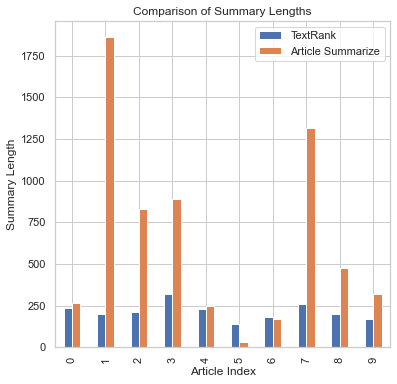

In [49]:
import matplotlib.pyplot as plt

# Assuming you have summaries generated from both methods
textrank_summaries = [textrank_summarize(article) for article in df['article'][0:10]]
article_summaries = article_summarize(df['article'][0:10])

# Calculate summary lengths
textrank_lengths = [len(summary.split()) for summary in textrank_summaries]
article_lengths = [len(summary.split()) for summary in article_summaries]

# Create a DataFrame for plotting
summary_lengths_df = pd.DataFrame({
    'TextRank': textrank_lengths,
    'Article Summarize': article_lengths
})

# Plot the summary lengths
summary_lengths_df.plot(kind='bar', figsize=(6, 6))
plt.title('Comparison of Summary Lengths')
plt.xlabel('Article Index')
plt.ylabel('Summary Length')
plt.show()


In [ ]:
from gensim.summarization import summarize

# Function to apply Gensim TextRank summarization
def gensim_textrank_summarize(article_text):
    summary = summarize(article_text, ratio=0.2)  # Adjust ratio as needed
    return summary

# Apply Gensim TextRank summarization to the same article
gensim_summary = gensim_textrank_summarize(article_text.values[0])
print("Gensim TextRank Summary:")
print(gensim_summary)
